In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt

import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns

colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'
meas = 'silta6_res1c2'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'scresonators'

In [ ]:
import yaml

with open('mini.yml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]

data_pth = pth_base+folder+'Data/'+params['pth'][ind]+params['dir'][ind]
#data_pth = pth_base+folder+params['pth'][ind]
img_name = params['pth'][ind][0:-1] +params['meas'][ind]

0


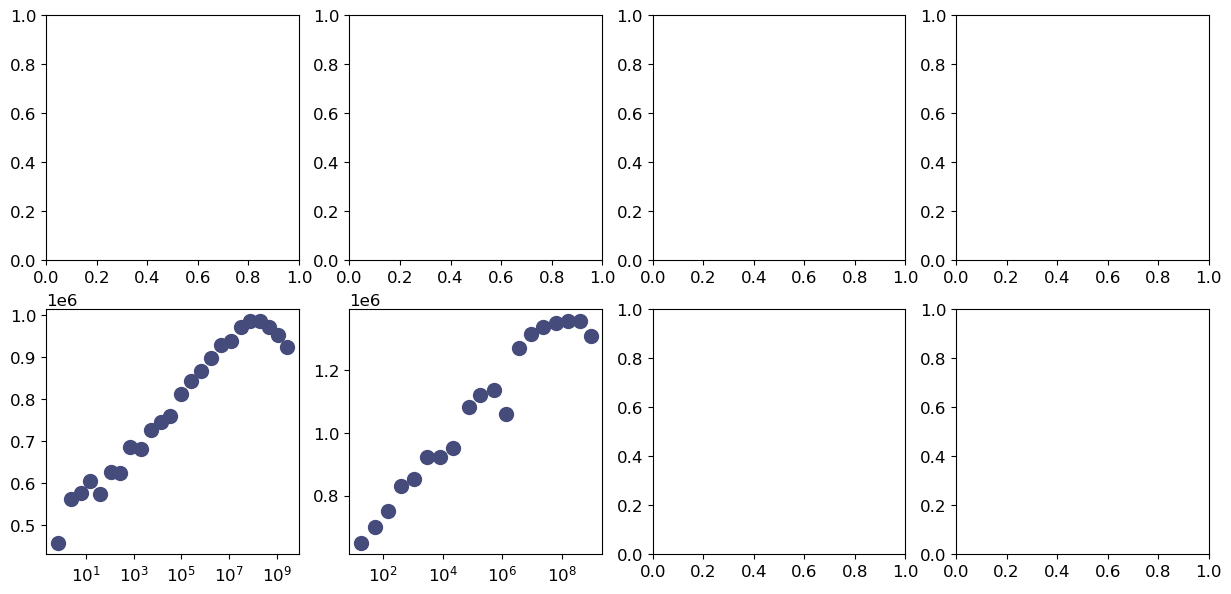

In [ ]:
import os 
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
csv_files_in_dir = [f for f in os.listdir(data_pth) if f.endswith('.csv')]
csv_files_in_dir.sort()
    #print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(data_pth, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=params['pitch'][i]
    df['target_freq']=params['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    ax[ord[i]].semilogx(df['photon_number'], df['q_internal_alt'],'o')


In [ ]:
df_full = df_full.sort_values(by='pitch')

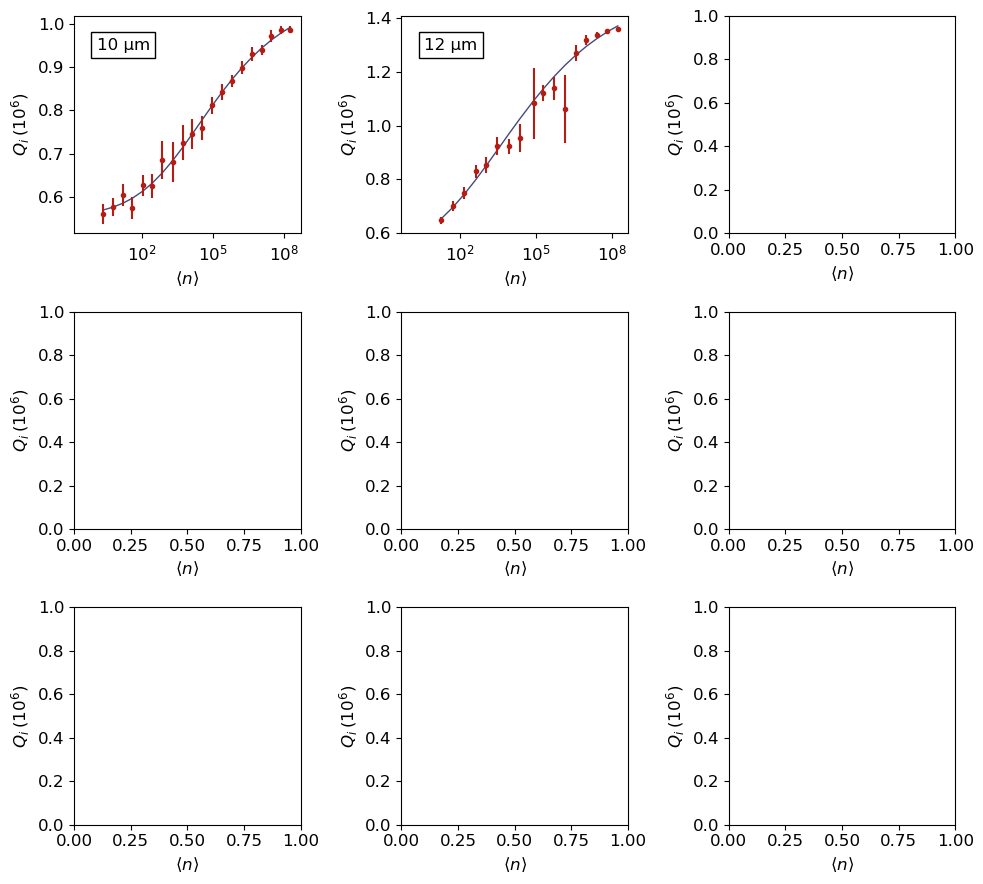

In [ ]:
max_photon = [2e8, 2e8]
min_photon = [1, 1]
cfg = ana_tls.fit_qi2(df_full, params, img_pth, name=img_name, max_photon_vec=max_photon, min_photon_vec=min_photon) 
ana_tls.plot_res_pars2([params], [''],img_pth, name=img_name)
